In [ ]:
from sklearn.datasets import load_files
from tensorflow.keras.utils import to_categorical
import numpy as np
from glob import glob
from collections import Counter
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential, Input
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

# define function to load train and test datasets
# the function returns 3 numpy arrays with filenames, one-hot-encoded values and raw outputs
def load_dataset(path):
    data = load_files(path)
    alphabet_files = np.array(data['filenames'])
    targets = np.array(data['target'])
    alphabet_targets = to_categorical(targets, 60)

    return alphabet_files, alphabet_targets, targets

# load train and test datasets
train_files, train_targets, raw_train_targets = load_dataset('/content/drive/MyDrive/Thesis/data')
#test_files, test_targets, raw_test_targets = load_dataset('F:/00 academic education/defense/test hobe/test')

# load list of characters
alphabets = [item[25:-1] for item in sorted(glob("/content/drive/MyDrive/Thesis/data/*/"))]

# print statistics about the dataset
print('There are %d total alphabets' % len(alphabets))
#print('There are %s total alphabet images.\n' % len(np.hstack([train_files, test_files])))
print('There are %d training alphabet images.' % len(train_files))
#print('There are %d test alphabet images.'% len(test_files))

There are 60 total alphabets
There are 9534 training alphabet images.


In [ ]:
# accuracy
model_acc={}
model_val_acc={}
# precesion
model_p = {}
# recall
model_r = {}
# f1 score
model_f1={}

Distribution of the training data in the dataset


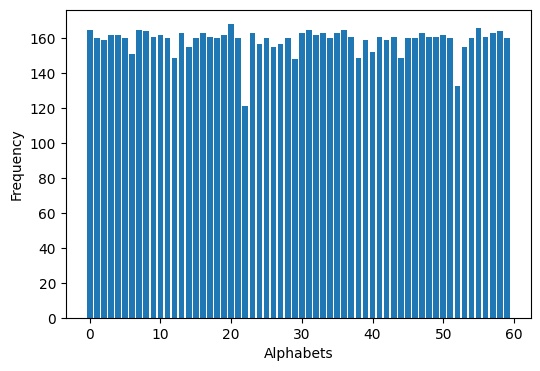

In [ ]:
def plot_dist(target_set):
    plt.figure(figsize=(6,4))
    labels, values = zip(*target_set.items())
    #indexes = np.arange(len(labels))
    width = 0.8
    plt.bar(labels, values, width)
    plt.xlabel('Alphabets')
    plt.ylabel('Frequency')
    plt.show()

print('Distribution of the training data in the dataset')
plot_dist(Counter(raw_train_targets))


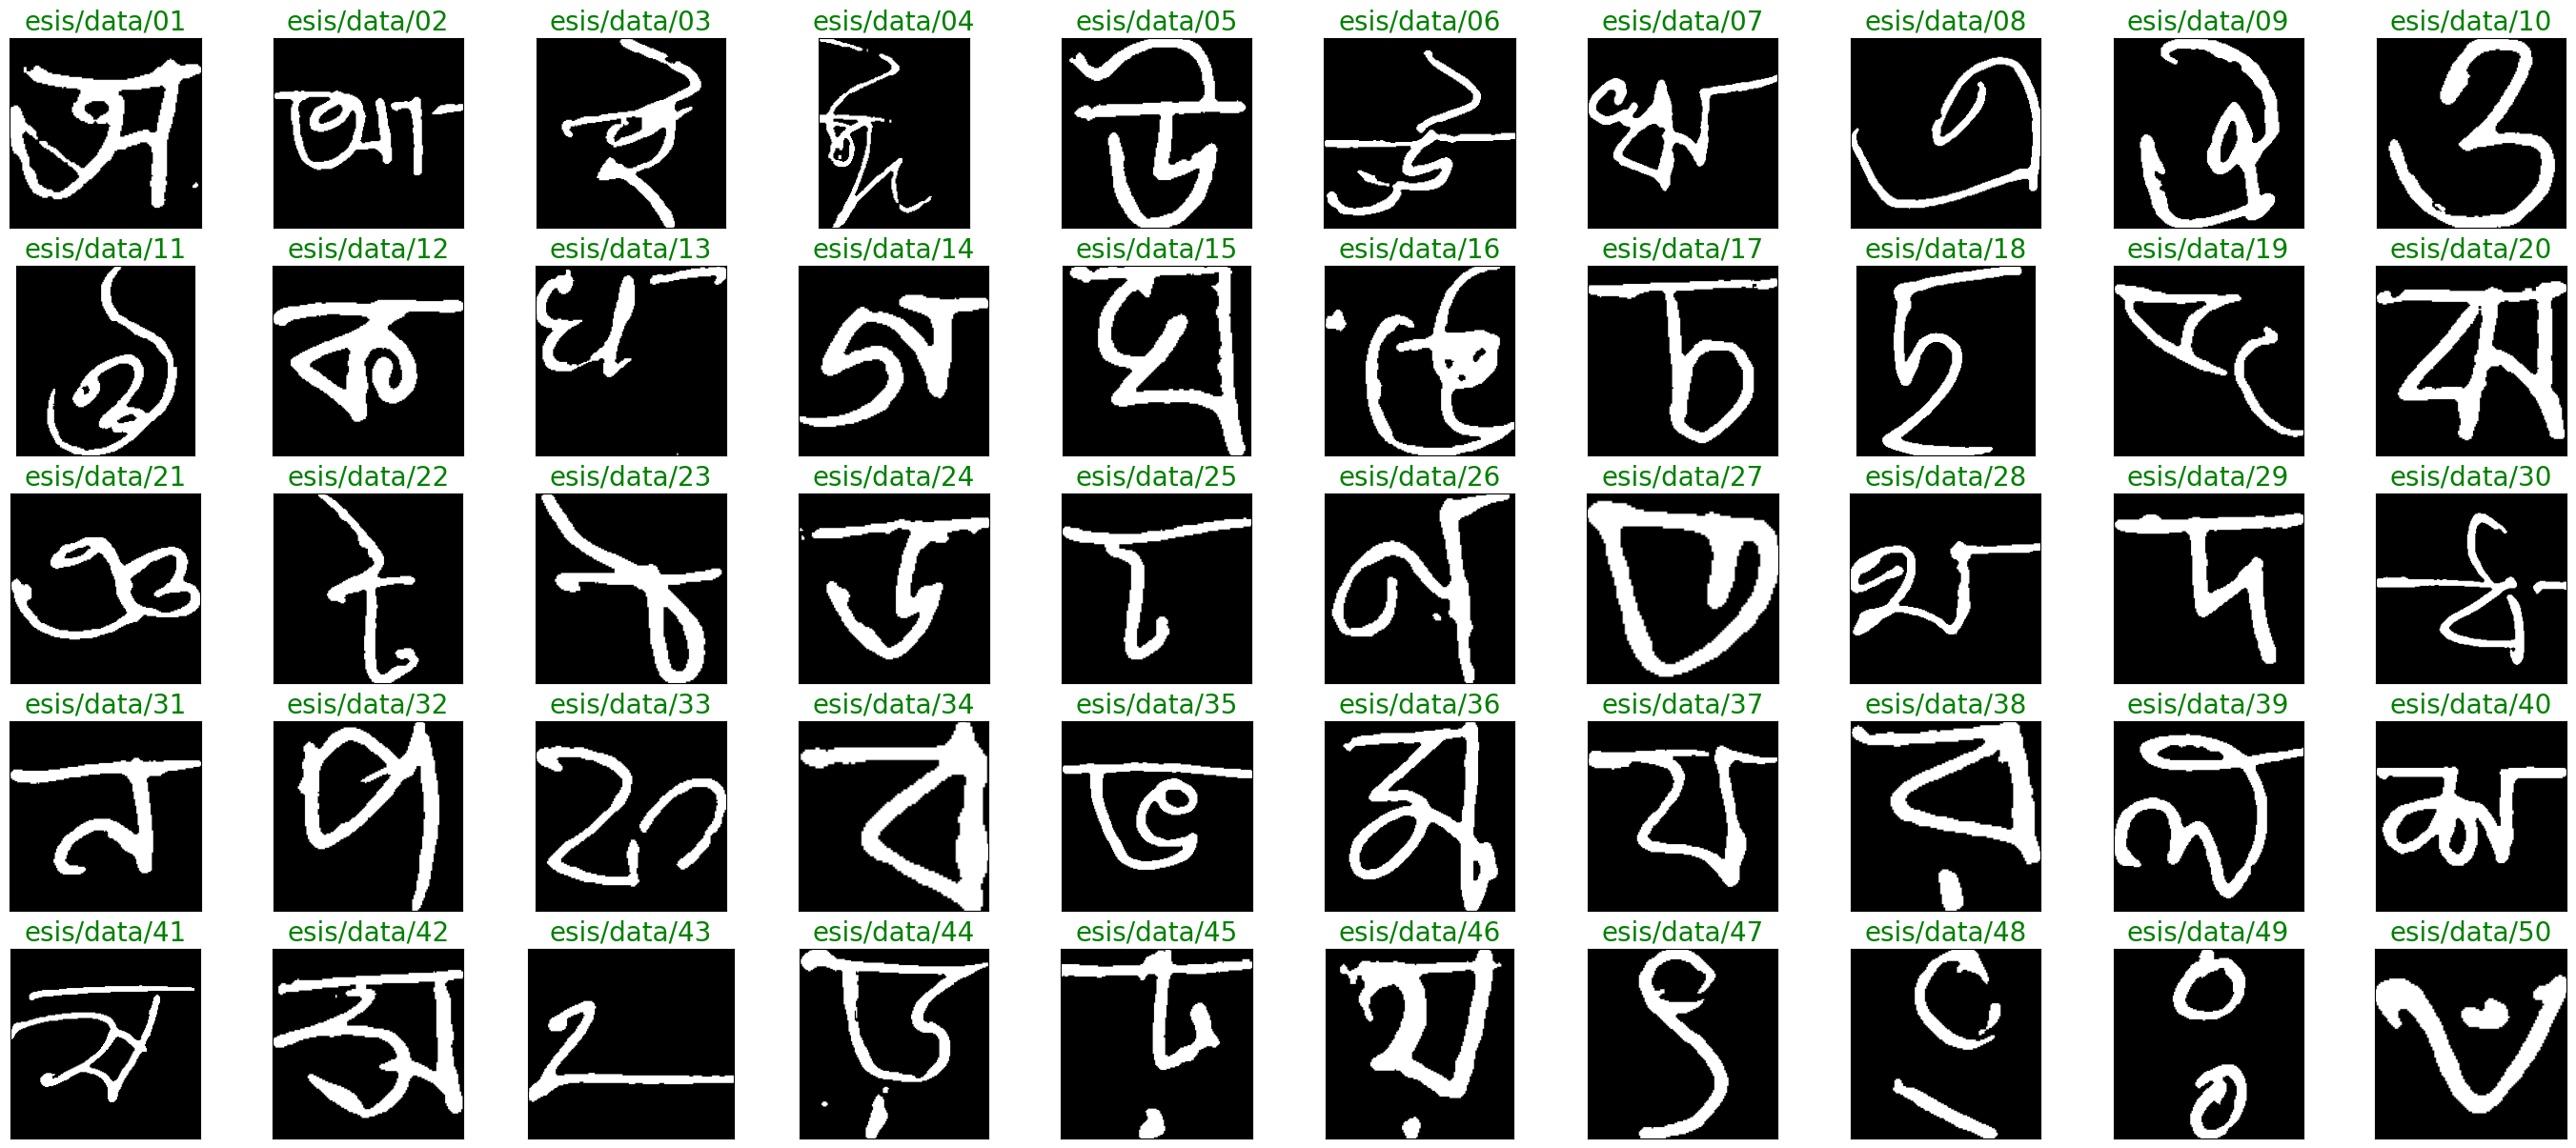

In [ ]:
# Scan through the training dataset to pick up one random character each folder
from PIL import Image
import glob
alphabet_folders = sorted(glob.glob("/content/drive/MyDrive/Thesis/data/*/"))
sample_files = []
for folder in alphabet_folders:
    sample_files.append(np.random.choice(glob.glob(folder + "*.png")))
sample_files = np.array(sample_files)

# Display the characters
fig = plt.figure(figsize=(35,15))
for i in range(50):
    ax = fig.add_subplot(5, 10, i + 1, xticks=[], yticks=[])
    img = Image.open(sample_files[i]).convert('L')  # Convert to grayscale
    ax.imshow(img, cmap='gray')
    ax.set_title("{}".format(alphabets[i]), color="green",fontsize=20)


plt.show()

There are 60 total alphabets
There are 7627 training alphabet images.
There are 954 validation alphabet images.
There are 953 test alphabet images.
Distribution of the validation data in the dataset


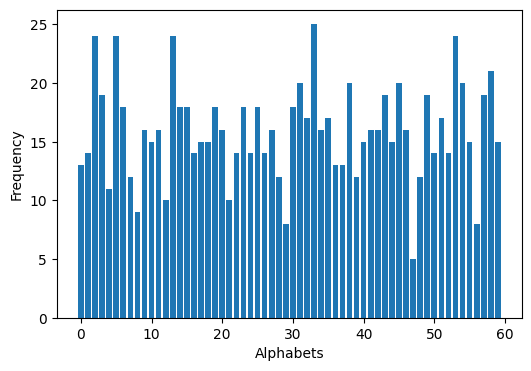

In [ ]:
# load train and test datasets
import glob

train_files, train_targets, raw_train_targets = load_dataset('/content/drive/MyDrive/Thesis/data')
#test_files, test_targets, raw_test_targets = load_dataset('F:/00 academic education/defense/test hobe/test')

# load list of characters
alphabets = [item[25:-1] for item in sorted(glob.glob("/content/drive/MyDrive/Thesis/data/*/"))]

# Splitting the Training set into the Training set and Validation set
from sklearn.model_selection import train_test_split
train_files, valid_files, train_targets, valid_targets = train_test_split(train_files, train_targets, test_size = 0.2, random_state = 0)


test_files,valid_files,test_targets,valid_targets= train_test_split(valid_files, valid_targets, test_size = 0.5, random_state = 0)
# print statistics about the dataset post split
print('There are %d total alphabets' % len(alphabets))
#print('There are %s total alphabet images.\n' % len(np.hstack([train_files, valid_files, test_files])))
print('There are %d training alphabet images.' % len(train_files))
print('There are %d validation alphabet images.' % len(valid_files))
print('There are %d test alphabet images.' % len(test_files))
#print('There are %d test alphabet images.\n'% len(test_files))

# Show distribution of data in validation set
raw_valid_targets = []
for i in range(len(valid_targets)):
    raw_valid_targets.append(np.argmax(valid_targets[i]))

raw_valid_targets = np.array(raw_valid_targets)
print('Distribution of the validation data in the dataset')
plot_dist(Counter(raw_valid_targets))

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
import numpy as np

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = load_img(img_path, target_size=(128, 128, 3))  # Updated target_size
    x = img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 128, 128, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in img_paths]
    return np.vstack(list_of_tensors)

# pre-process the data for Keras. We rescale the images by dividing every pixel in every image by 255.
# So the scale is now 0-1 instead of 0-255.
train_tensors = paths_to_tensor(train_files).astype('float32')/255
valid_tensors = paths_to_tensor(valid_files).astype('float32')/255
test_tensors = paths_to_tensor(test_files).astype('float32')/255

# print number of training, validation, and test images
print(train_tensors.shape[0], 'train samples')
print(valid_tensors.shape[0], 'valid samples')
print(test_tensors.shape[0], 'test samples')


7627 train samples
954 valid samples
953 test samples


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,precision_score,f1_score, recall_score,precision_score,average_precision_score,accuracy_score
train_tensors.shape

(7627, 128, 128, 3)

In [ ]:
# Importing the Keras libraries and packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dropout, Flatten, Dense


from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import SeparableConv2D, BatchNormalization, MaxPool2D

def conv_block(filters, act='relu'):
    """Defining a Convolutional NN block for a Sequential CNN model. """

    block = Sequential()
    block.add(Conv2D(filters, 3, activation=act, padding='same'))
    block.add(Conv2D(filters, 3, activation=act, padding='same'))
    block.add(BatchNormalization())
    block.add(MaxPool2D())

    return block
def dense_block(units, dropout_rate, act='relu'):
    """Defining a Dense NN block for a Sequential CNN model. """

    block = Sequential()
    block.add(Dense(units, activation=act))
    block.add(BatchNormalization())
    block.add(Dropout(dropout_rate))

    return block

def construct_model(act='relu'):
    """Constructing a Sequential CNN architecture for performing the classification task. """

    model = Sequential([
        Input(shape=(128,128,3)),
        Conv2D(16, 3, activation=act, padding='same'),
        Conv2D(32, 3, activation=act, padding='same'),
        MaxPool2D(),
        conv_block(32),
        MaxPool2D(),
        conv_block(64),
        conv_block(128),
        Dropout(0.2),
        #conv_block(256),
        #Dropout(0.2),
        Flatten(),

        dense_block(512, 0.3),
        dense_block(256, 0.2),
        Dense(60, activation='softmax')
    ], name = "cnn_model")

    return model


model = construct_model()
model.summary()
from tensorflow.keras import optimizers
#opt = optimizers.Adam(learning_rate=0.001)
### Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "cnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 sequential (Sequential)     (None, 32, 32, 32)        18624     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 sequential_1 (Sequential)   (None, 8, 8, 64)          55

In [ ]:
### Train the model and save the weights for the best one
from keras.callbacks import ModelCheckpoint

#specify the number of epochs that you would like to use to train the model.

epochs = 15
batch_size = 32


historywithourdense80_50=model.fit(train_tensors, train_targets,
          validation_data=(valid_tensors, valid_targets),
          epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/15
238/238 [==============================] - 413s 2s/step - loss: 2.4646 - accuracy: 0.3664 - val_loss: 7.6730 - val_accuracy: 0.0526
Epoch 2/15
238/238 [==============================] - 411s 2s/step - loss: 1.2172 - accuracy: 0.6498 - val_loss: 1.2288 - val_accuracy: 0.6467
Epoch 3/15
238/238 [==============================] - 410s 2s/step - loss: 0.8555 - accuracy: 0.7451 - val_loss: 0.9073 - val_accuracy: 0.7403
Epoch 4/15
238/238 [==============================] - 403s 2s/step - loss: 0.6594 - accuracy: 0.8065 - val_loss: 0.7933 - val_accuracy: 0.7781
Epoch 5/15
238/238 [==============================] - 401s 2s/step - loss: 0.5331 - accuracy: 0.8403 - val_loss: 0.7635 - val_accuracy: 0.7781
Epoch 6/15
238/238 [==============================] - 398s 2s/step - loss: 0.4548 - accuracy: 0.8634 - val_loss: 0.6003 - val_accuracy: 0.8254
Epoch 7/15
238/238 [==============================] - 402s 2s/step - loss: 0.3645 - accuracy: 0.8880 - val_loss: 0.8120 - val_accuracy: 0.7760

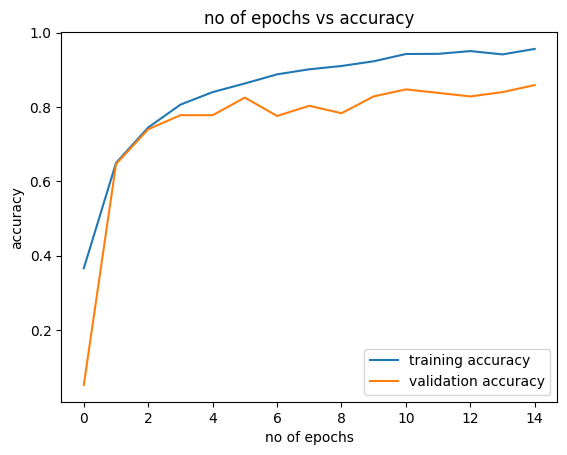

In [ ]:
acc=historywithourdense80_50.history['accuracy']  ##getting  accuracy of each epochs
epochs_=range(0,15)
plt.plot(epochs_,acc,label='training accuracy')
plt.xlabel('no of epochs')
plt.ylabel('accuracy')

acc_val=historywithourdense80_50.history['val_accuracy']  ##getting validation accuracy of each epochs
plt.plot(epochs_,acc_val,label="validation accuracy")
plt.title("no of epochs vs accuracy")
plt.legend()

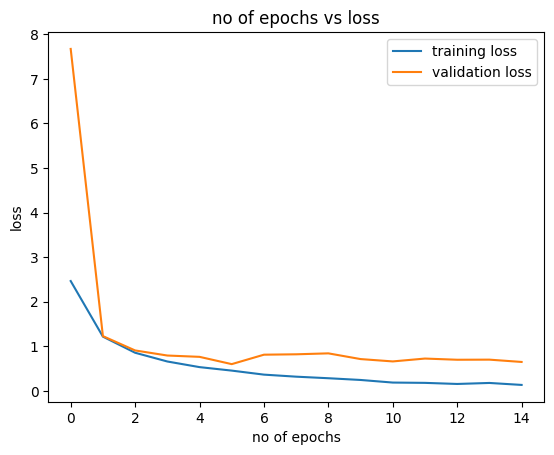

In [ ]:
acc=historywithourdense80_50.history['loss']  ##getting  accuracy of each epochs
epochs_=range(0,15)
plt.plot(epochs_,acc,label='training loss')
plt.xlabel('no of epochs')
plt.ylabel('loss')

acc_val=historywithourdense80_50.history['val_loss']  ##getting validation accuracy of each epochs
plt.plot(epochs_,acc_val,label="validation loss")
plt.title("no of epochs vs loss")
plt.legend()

In [ ]:
Train_acc1=historywithourdense80_50.history['accuracy'][-1]
Val_acc1=historywithourdense80_50.history['val_accuracy'][-1]

model_acc["CNN"]=Train_acc1
model_val_acc["CNN"]=Val_acc1
print("Train accuracy",Train_acc1)
print("Validation accuracy",Val_acc1)

Train accuracy 0.9563502669334412
Validation accuracy 0.8590956926345825


In [ ]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs1 = model.predict(test_tensors, batch_size=32)
predIdxs1 = np.argmax(predIdxs1, axis=1)
# show a nicely formatted classification report
print(classification_report(test_targets.argmax(axis=1), predIdxs1))

[INFO] evaluating network...
30/30 [==============================] - 14s 455ms/step
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        24
           1       1.00      0.92      0.96        12
           2       1.00      0.70      0.82        23
           3       0.77      0.94      0.85        18
           4       1.00      0.68      0.81        22
           5       0.80      1.00      0.89        20
           6       1.00      0.96      0.98        25
           7       0.88      0.94      0.91        16
           8       0.80      0.84      0.82        19
           9       0.88      0.50      0.64        14
          10       0.94      0.83      0.88        18
          11       1.00      0.87      0.93        15
          12       0.81      0.68      0.74        19
          13       0.86      0.90      0.88        20
          14       0.62      0.77      0.69        13
          15       0.94      0.83      0.88       

In [ ]:
cf1=confusion_matrix(test_targets.argmax(axis=1), predIdxs1)
cf1

array([[24,  0,  0, ...,  0,  0,  0],
       [ 0, 11,  0, ...,  0,  0,  0],
       [ 0,  0, 16, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 12,  0,  0],
       [ 0,  0,  0, ...,  0, 14,  0],
       [ 0,  0,  0, ...,  0,  0, 17]])

<Axes: >

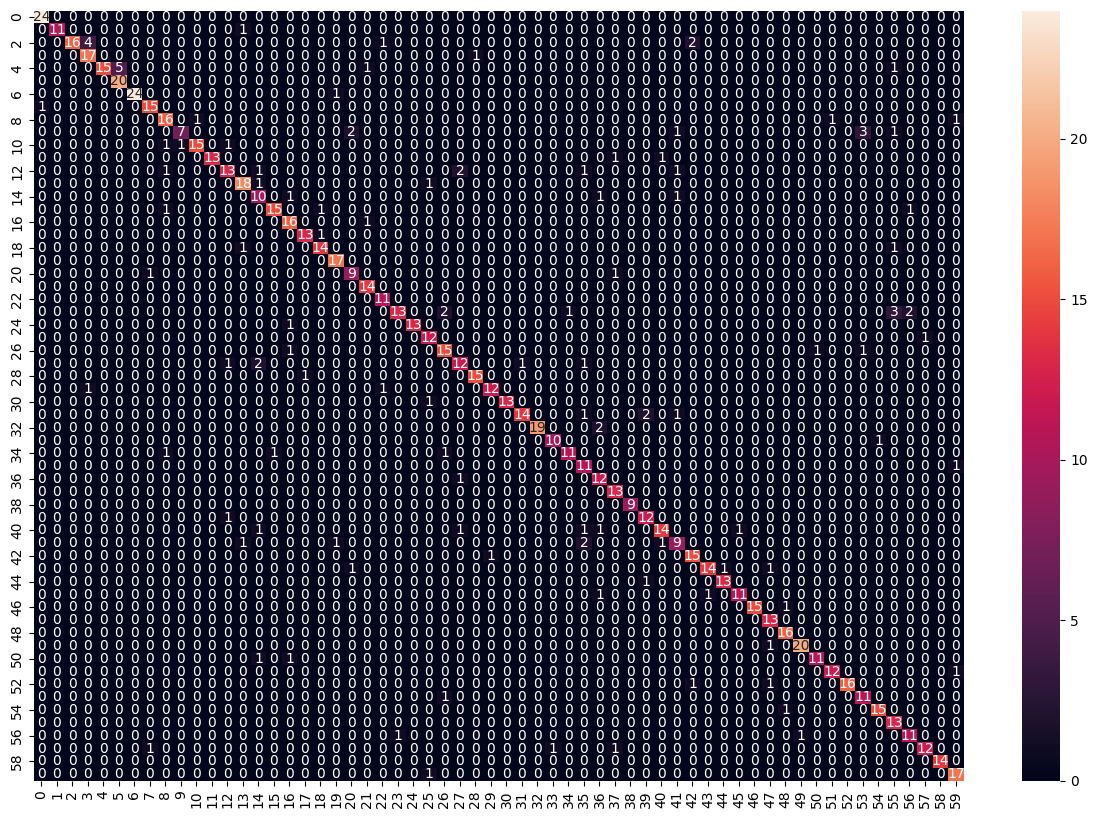

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(cf1, annot=True,fmt="1.0f")

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,precision_score,f1_score, recall_score,precision_score,average_precision_score,accuracy_score
# recall
vgg_r = recall_score(test_targets.argmax(axis=1), predIdxs1, average='weighted')
# precesion
vgg_p = precision_score(test_targets.argmax(axis=1), predIdxs1, average='weighted')
# f1 score
vgg_f1 = f1_score(test_targets.argmax(axis=1), predIdxs1, average='weighted')

print("Recall score: ",recall_score(test_targets.argmax(axis=1), predIdxs1,average='weighted'))
print("Precision score: ",precision_score(test_targets.argmax(axis=1), predIdxs1, average='weighted'))
print("F1 score: ",f1_score(test_targets.argmax(axis=1), predIdxs1, average='weighted'))

model_r["CNN"]=vgg_r

model_p["CNN"]=vgg_p

model_f1["CNN"]=vgg_f1

Recall score:  0.8738170347003155
Precision score:  0.8844389762644052
F1 score:  0.8728497632040286


# VGG16

In [ ]:
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Sequential, Input

modelvgg = VGG16(weights= 'imagenet', include_top=False,input_tensor=Input(shape=(128, 128, 3)))
modelvgg.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                              

In [ ]:
from tensorflow.keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

#Adding custom Layers
x = modelvgg.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.4)(x)
predictions = Dense(60, activation="softmax")(x)

# creating the final model
model_2 =  Model(inputs=modelvgg.input, outputs=predictions)
model_2.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [ ]:
# set the first 25 layers (up to the last conv block)
# to non-trainable (weights will not be updated)
for layer in modelvgg.layers[:25]:
    layer.trainable = False

In [ ]:
#Defining other parameters for our CNN model
from keras.callbacks import ModelCheckpoint
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#specify the number of epochs that you would like to use to train the model.

epochs = 10
batch_size = 32


history_vgg = model_2.fit(train_tensors, train_targets,
          validation_data=(valid_tensors, valid_targets),
          epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/10
238/238 [==============================] - 1772s 7s/step - loss: 1.9651 - accuracy: 0.4942 - val_loss: 0.9959 - val_accuracy: 0.7129
Epoch 2/10
238/238 [==============================] - 1749s 7s/step - loss: 0.8916 - accuracy: 0.7389 - val_loss: 0.7750 - val_accuracy: 0.7802
Epoch 3/10
238/238 [==============================] - 1771s 7s/step - loss: 0.6496 - accuracy: 0.8041 - val_loss: 0.6609 - val_accuracy: 0.8128
Epoch 4/10
238/238 [==============================] - 1753s 7s/step - loss: 0.4963 - accuracy: 0.8474 - val_loss: 0.6588 - val_accuracy: 0.7950
Epoch 5/10
238/238 [==============================] - 1753s 7s/step - loss: 0.4357 - accuracy: 0.8691 - val_loss: 0.7067 - val_accuracy: 0.7992
Epoch 6/10
238/238 [==============================] - 1747s 7s/step - loss: 0.3667 - accuracy: 0.8840 - val_loss: 0.6156 - val_accuracy: 0.8244
Epoch 7/10
238/238 [==============================] - 1741s 7s/step - loss: 0.3176 - accuracy: 0.8967 - val_loss: 0.6164 - val_accuracy:

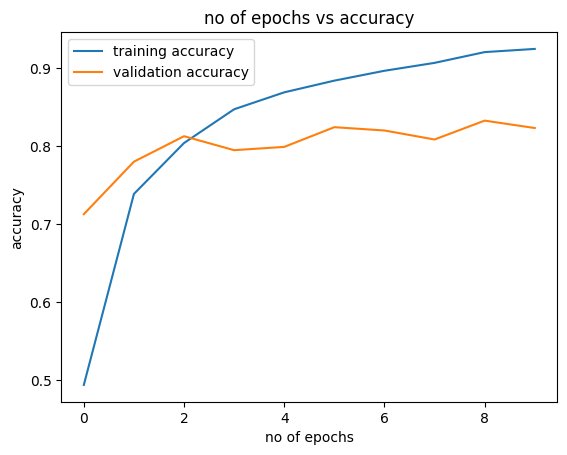

In [ ]:
acc=history_vgg.history['accuracy']  ##getting  accuracy of each epochs
epochs_=range(0,10)
plt.plot(epochs_,acc,label='training accuracy')
plt.xlabel('no of epochs')
plt.ylabel('accuracy')

acc_val=history_vgg.history['val_accuracy']  ##getting validation accuracy of each epochs
plt.plot(epochs_,acc_val,label="validation accuracy")
plt.title("no of epochs vs accuracy")
plt.legend()

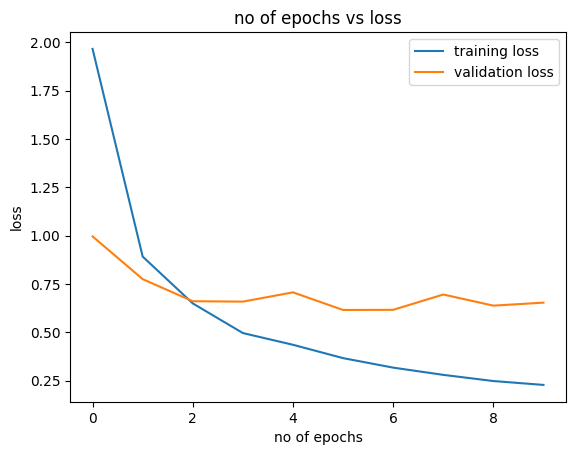

In [ ]:
acc=history_vgg.history['loss']  ##getting  accuracy of each epochs
epochs_=range(0,10)
plt.plot(epochs_,acc,label='training loss')
plt.xlabel('no of epochs')
plt.ylabel('loss')

acc_val=history_vgg.history['val_loss']  ##getting validation accuracy of each epochs
plt.plot(epochs_,acc_val,label="validation loss")
plt.title("no of epochs vs loss")
plt.legend()

In [ ]:
Train_acc1=history_vgg.history['accuracy'][-1]
Val_acc1=history_vgg.history['val_accuracy'][-1]

model_acc["VGG16"]=Train_acc1
model_val_acc["VGG16"]=Val_acc1
print("Train accuracy",Train_acc1)
print("Validation accuracy",Val_acc1)

Train accuracy 0.9246647357940674
Validation accuracy 0.8233438730239868


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,precision_score,f1_score, recall_score,precision_score,average_precision_score,accuracy_score
# recall
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs2 = model_2.predict(test_tensors, batch_size=32)
predIdxs2 = np.argmax(predIdxs2, axis=1)
# show a nicely formatted classification report
print(classification_report(test_targets.argmax(axis=1), predIdxs2))

[INFO] evaluating network...
30/30 [==============================] - 197s 6s/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.00      0.00      0.00        12
           2       0.00      0.00      0.00        23
           3       0.00      0.00      0.00        18
           4       0.00      0.00      0.00        22
           5       0.00      0.00      0.00        20
           6       0.00      0.00      0.00        25
           7       0.00      0.00      0.00        16
           8       0.00      0.00      0.00        19
           9       0.00      0.00      0.00        14
          10       0.00      0.00      0.00        18
          11       0.00      0.00      0.00        15
          12       0.00      0.00      0.00        19
          13       0.00      0.00      0.00        20
          14       0.00      0.00      0.00        13
          15       0.02      0.17      0.03        1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cf2=confusion_matrix(test_targets.argmax(axis=1), predIdxs2)
cf2

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 2],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

<Axes: >

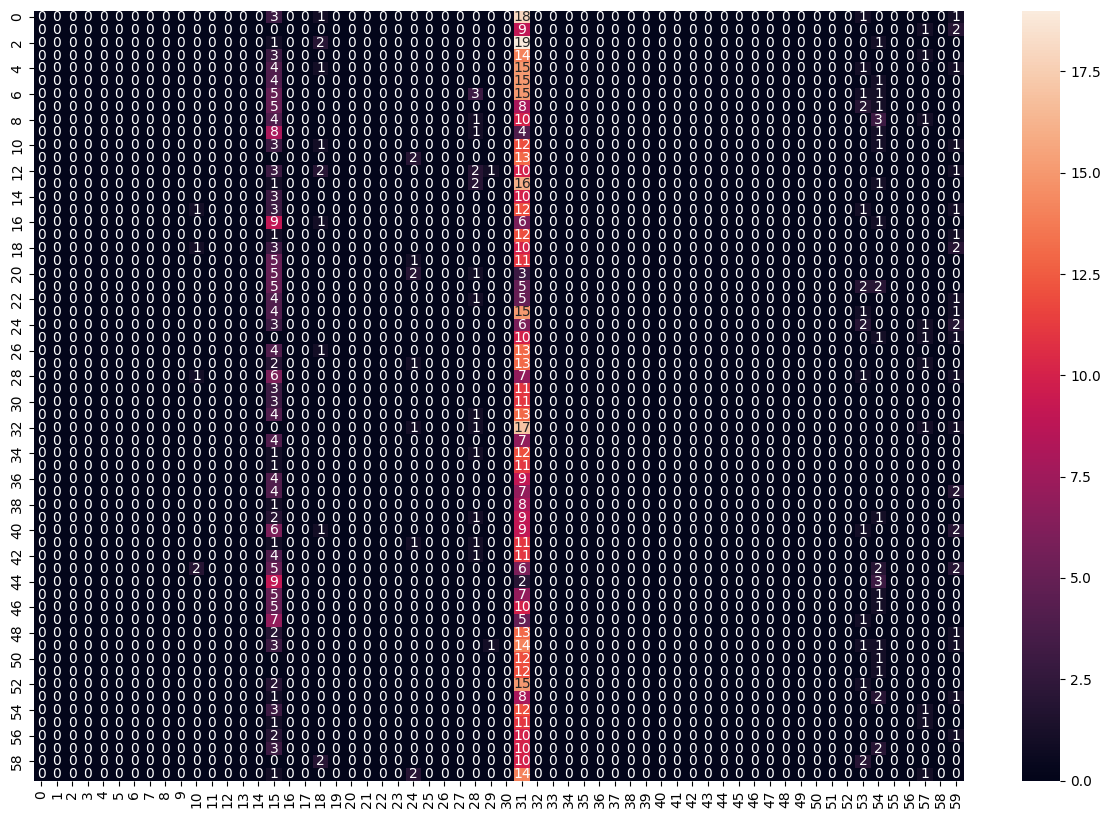

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(cf2, annot=True,fmt="1.0f")

In [ ]:

vgg_r = recall_score(test_targets.argmax(axis=1), predIdxs2, average='weighted')
# precesion
vgg_p = precision_score(test_targets.argmax(axis=1), predIdxs2, average='weighted')
# f1 score
vgg_f1 = f1_score(test_targets.argmax(axis=1), predIdxs2, average='weighted')

print("Recall score: ",recall_score(test_targets.argmax(axis=1), predIdxs2,average='weighted'))
print("Precision score: ",precision_score(test_targets.argmax(axis=1), predIdxs2, average='weighted'))
print("F1 score: ",f1_score(test_targets.argmax(axis=1), predIdxs2, average='weighted'))

model_r["VGG16"]=vgg_r

model_p["VGG16"]=vgg_p

model_f1["VGG16"]=vgg_f1

Recall score:  0.016824395373291272
Precision score:  0.0006907489894833744
F1 score:  0.0013072196150123911


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# MobileNet

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D,BatchNormalization
from tensorflow.keras.models import Model

In [ ]:
uploaded_path = "/kaggle/input/mobilenet/mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_224_no_top.h5"
baseModel = MobileNetV2(weights=uploaded_path, include_top=False,input_tensor=Input(shape=(128, 128, 3)))
baseModel.summary()

Model: "mobilenetv2_1.00_None"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 64, 64,    │        864 │ input_layer_8[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 64, 64,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 64, 64,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 64, 64,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 64, 64,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 64, 64,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 65, 65,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 32, 32,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 32, 32,    │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [ ]:
headModel = baseModel.output
headModel = Flatten()(headModel)
headModel = Dense(512, activation="relu")(headModel)
headModel = BatchNormalization()(headModel)
headModel = Dropout(0.4)(headModel)  # Adjust dropout rate as needed
headModel = Dense(256, activation="relu")(headModel)
# headModel = BatchNormalization()(headModel)
headModel = Dropout(0.4)(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)# Adjust dropout rate as needed # Adjust dropout rate as needed
headModel = Dense(60, activation='softmax')(headModel)

model_3 = Model(inputs=baseModel.input, outputs=headModel)

for layer in baseModel.layers:
    layer.trainable = False

In [ ]:
#Defining other parameters for our CNN model
from keras.callbacks import ModelCheckpoint
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#specify the number of epochs that you would like to use to train the model.

epochs = 10
batch_size = 32


history_Mnet = model_3.fit(train_tensors, train_targets,
          validation_data=(valid_tensors, valid_targets),
          epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/10
 10/238 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.0331 - loss: 5.2232  

W0000 00:00:1712554656.134883      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.1001 - loss: 3.9959

W0000 00:00:1712554669.284191      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712554673.061674      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


238/238 ━━━━━━━━━━━━━━━━━━━━ 37s 91ms/step - accuracy: 0.1005 - loss: 3.9935 - val_accuracy: 0.5105 - val_loss: 1.9135
Epoch 2/10
  8/238 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.3491 - loss: 2.4473

W0000 00:00:1712554677.765483      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.3595 - loss: 2.3886 - val_accuracy: 0.6232 - val_loss: 1.3448
Epoch 3/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.4766 - loss: 1.7810 - val_accuracy: 0.6747 - val_loss: 1.1485
Epoch 4/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.5786 - loss: 1.3963 - val_accuracy: 0.7116 - val_loss: 1.0387
Epoch 5/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.6478 - loss: 1.1841 - val_accuracy: 0.7074 - val_loss: 0.9721
Epoch 6/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.6710 - loss: 1.0746 - val_accuracy: 0.7516 - val_loss: 0.9239
Epoch 7/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.7072 - loss: 0.9496 - val_accuracy: 0.7084 - val_loss: 1.0221
Epoch 8/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.7359 - loss: 0.8465 - val_accuracy: 0.7358 - val_loss: 0.9107
Epoch 9/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.7551 - loss: 0.7754 - val_accuracy: 0.745

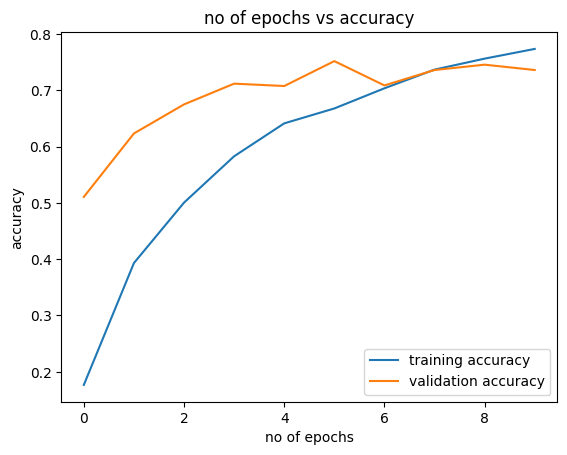

In [ ]:
acc=history_Mnet.history['accuracy']  ##getting  accuracy of each epochs
epochs_=range(0,10)
plt.plot(epochs_,acc,label='training accuracy')
plt.xlabel('no of epochs')
plt.ylabel('accuracy')

acc_val=history_Mnet.history['val_accuracy']  ##getting validation accuracy of each epochs
plt.plot(epochs_,acc_val,label="validation accuracy")
plt.title("no of epochs vs accuracy")
plt.legend()

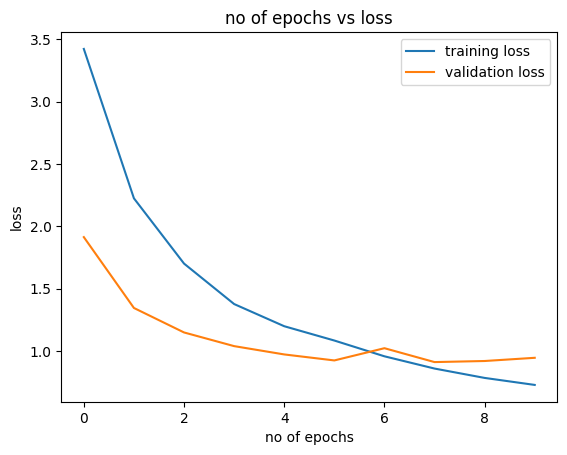

In [ ]:
acc=history_Mnet.history['loss']  ##getting  accuracy of each epochs
epochs_=range(0,10)
plt.plot(epochs_,acc,label='training loss')
plt.xlabel('no of epochs')
plt.ylabel('loss')

acc_val=history_Mnet.history['val_loss']  ##getting validation accuracy of each epochs
plt.plot(epochs_,acc_val,label="validation loss")
plt.title("no of epochs vs loss")
plt.legend()

In [ ]:
Train_acc1=history_Mnet.history['accuracy'][-1]
Val_acc1=history_Mnet.history['val_accuracy'][-1]

model_acc["MobileNet"]=Train_acc1
model_val_acc["MobileNet"]=Val_acc1
print("Train accuracy",Train_acc1)
print("Validation accuracy",Val_acc1)

Train accuracy 0.7732297778129578
Validation accuracy 0.7357894778251648


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,precision_score,f1_score, recall_score,precision_score,average_precision_score,accuracy_score
# recall
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs3 = model_3.predict(test_tensors, batch_size=32)
predIdxs3 = np.argmax(predIdxs3, axis=1)
# show a nicely formatted classification report
print(classification_report(test_targets.argmax(axis=1), predIdxs3))

[INFO] evaluating network...
14/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

W0000 00:00:1712554742.774071      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 117ms/step
              precision    recall  f1-score   support

           0       0.67      0.80      0.73        10
           1       0.92      0.92      0.92        12
           2       0.83      0.75      0.79        20
           3       1.00      0.72      0.84        18
           4       0.52      0.93      0.67        14
           5       0.81      0.68      0.74        19
           6       0.82      0.64      0.72        14
           7       0.90      0.82      0.86        11
           8       0.90      0.64      0.75        14
           9       0.71      0.71      0.71        17
          10       0.68      0.87      0.76        15
          11       0.92      0.67      0.77        18
          12       0.38      0.17      0.23        18
          13       0.73      0.64      0.68        25
          14       0.71      0.26      0.38        19
          15       0.48      0.83      0.61        12
          16       0.71      0.88      0

W0000 00:00:1712554746.178498      92 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [ ]:
cf3=confusion_matrix(test_targets.argmax(axis=1), predIdxs3)
cf3

array([[ 8,  0,  0, ...,  0,  0,  0],
       [ 1, 11,  0, ...,  0,  0,  0],
       [ 0,  0, 15, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 12,  0,  0],
       [ 0,  0,  0, ...,  0, 16,  0],
       [ 0,  0,  0, ...,  0,  0, 16]])

<Axes: >

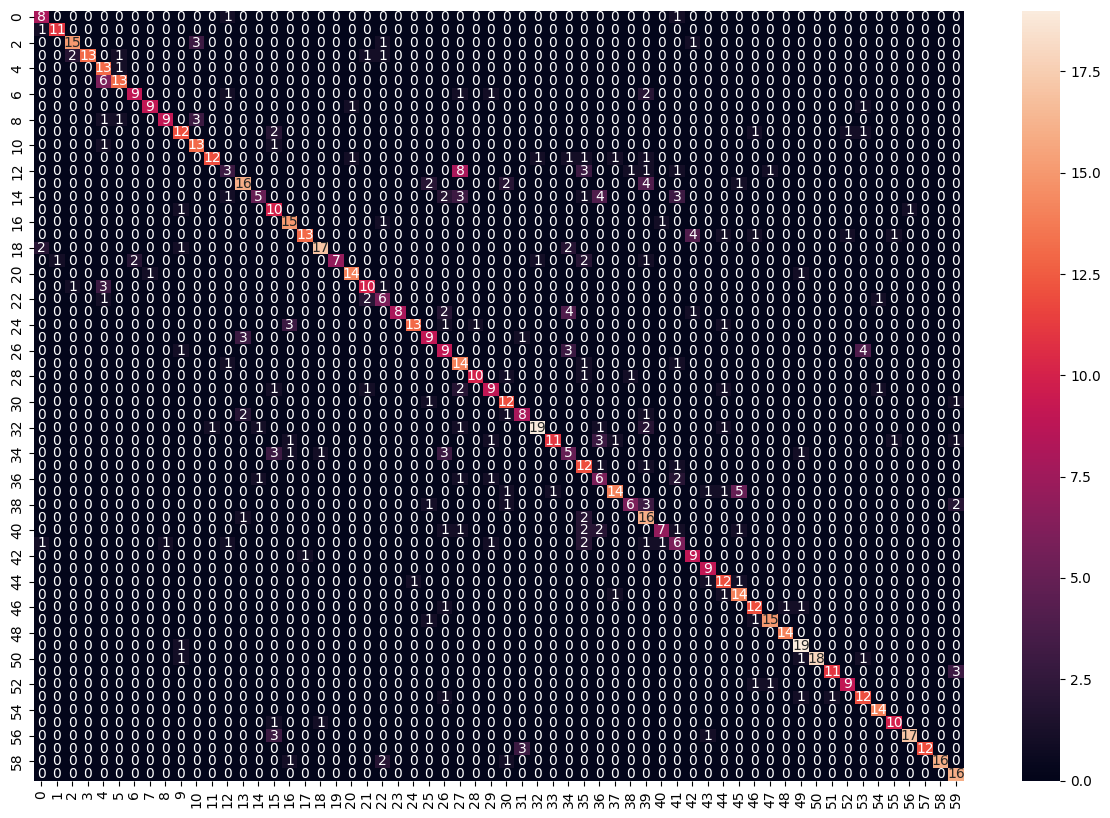

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(cf3, annot=True,fmt="1.0f")

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,precision_score,f1_score, recall_score,precision_score,average_precision_score,accuracy_score
# recall
v_r = recall_score(test_targets.argmax(axis=1), predIdxs3, average='weighted')
# precesion
v_p = precision_score(test_targets.argmax(axis=1), predIdxs3, average='weighted')
# f1 score
v_f1 = f1_score(test_targets.argmax(axis=1), predIdxs3, average='weighted')

print("Recall score: ",recall_score(test_targets.argmax(axis=1), predIdxs3,average='weighted'))
print("Precision score: ",precision_score(test_targets.argmax(axis=1), predIdxs3, average='weighted'))
print("F1 score: ",f1_score(test_targets.argmax(axis=1), predIdxs3, average='weighted'))

model_r["MobileNet"]=v_r

model_p["MobileNet"]=v_p

model_f1["MobileNet"]=v_f1

Recall score:  0.7221052631578947
Precision score:  0.7600987996060707
F1 score:  0.7228718552090659


# DenseNet

In [ ]:
from tensorflow.keras.applications import DenseNet169
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense,Activation,BatchNormalization
from tensorflow.keras.models import Model

In [ ]:
uploaded_path = "/kaggle/input/densenet/densenet169_weights_tf_dim_ordering_tf_kernels_notop.h5"
model6 = DenseNet169(input_shape=(128,128,3),include_top=False, weights=uploaded_path)
model6.trainable = False

In [ ]:
# Building Model

model_6=Sequential()
model_6.add(model6)
model_6.add(Dropout(0.4))
model_6.add(Flatten())
model_6.add(BatchNormalization())
model_6.add(Dense(128,kernel_initializer='he_uniform'))
# model_6.add(BatchNormalization())
model_6.add(Activation('relu'))
model_6.add(Dropout(0.5))
# model_6.add(Dense(1024,kernel_initializer='he_uniform'))
# model_6.add(BatchNormalization())
# model_6.add(Activation('relu'))
# model_6.add(Dropout(0.5))
model_6.add(Dense(60,activation='softmax'))
model_6.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet169 (Functional)        │ ?                      │    12,642,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,642,880 (48.23 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 12,642,880 (48.23 MB)

In [ ]:
from keras.callbacks import ModelCheckpoint
model_6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#specify the number of epochs that you would like to use to train the model.

epochs = 10
batch_size = 32


history_dense = model_6.fit(train_tensors, train_targets,
          validation_data=(valid_tensors, valid_targets), epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/10
  4/238 ━━━━━━━━━━━━━━━━━━━━ 14s 63ms/step - accuracy: 0.0579 - loss: 4.5129

W0000 00:00:1712555196.721895      90 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.2569 - loss: 3.3464

W0000 00:00:1712555242.543569      90 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


238/238 ━━━━━━━━━━━━━━━━━━━━ 110s 276ms/step - accuracy: 0.2573 - loss: 3.3437 - val_accuracy: 0.6516 - val_loss: 1.4786
Epoch 2/10
  2/238 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - accuracy: 0.6406 - loss: 1.6702

W0000 00:00:1712555262.137300      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


238/238 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.5658 - loss: 1.6381 - val_accuracy: 0.7295 - val_loss: 1.0495
Epoch 3/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.6718 - loss: 1.1397 - val_accuracy: 0.7547 - val_loss: 0.9493
Epoch 4/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.7087 - loss: 1.0221 - val_accuracy: 0.7768 - val_loss: 0.9270
Epoch 5/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.7380 - loss: 0.8741 - val_accuracy: 0.7747 - val_loss: 0.9378
Epoch 6/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.7681 - loss: 0.7940 - val_accuracy: 0.7842 - val_loss: 0.9168
Epoch 7/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.7756 - loss: 0.7441 - val_accuracy: 0.7842 - val_loss: 0.9172
Epoch 8/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.7977 - loss: 0.6722 - val_accuracy: 0.7758 - val_loss: 0.8724
Epoch 9/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.8040 - loss: 0.6290 - val_accurac

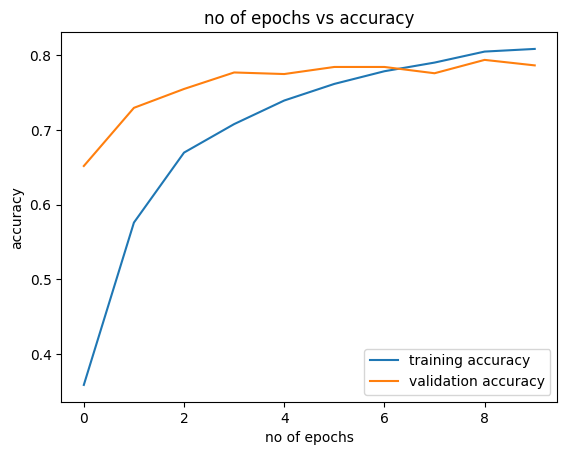

In [ ]:
acc=history_dense.history['accuracy']  ##getting  accuracy of each epochs
epochs_=range(0,10)
plt.plot(epochs_,acc,label='training accuracy')
plt.xlabel('no of epochs')
plt.ylabel('accuracy')

acc_val=history_dense.history['val_accuracy']  ##getting validation accuracy of each epochs
plt.plot(epochs_,acc_val,label="validation accuracy")
plt.title("no of epochs vs accuracy")
plt.legend()

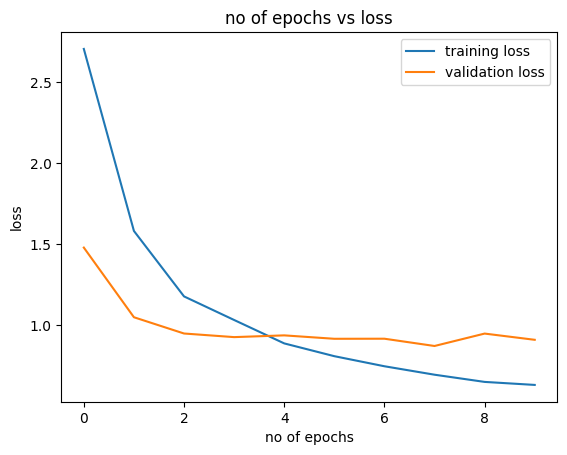

In [ ]:
acc=history_dense.history['loss']  ##getting  accuracy of each epochs
epochs_=range(0,10)
plt.plot(epochs_,acc,label='training loss')
plt.xlabel('no of epochs')
plt.ylabel('loss')

acc_val=history_dense.history['val_loss']  ##getting validation accuracy of each epochs
plt.plot(epochs_,acc_val,label="validation loss")
plt.title("no of epochs vs loss")
plt.legend()

In [ ]:
Train_acc1=history_dense.history['accuracy'][-1]
Val_acc1=history_dense.history['val_accuracy'][-1]

model_acc["DenseNet"]=Train_acc1
model_val_acc["DenseNet"]=Val_acc1
print("Train accuracy",Train_acc1)
print("Validation accuracy",Val_acc1)

Train accuracy 0.8083706498146057
Validation accuracy 0.7863157987594604


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,precision_score,f1_score, recall_score,precision_score,average_precision_score,accuracy_score
# recall
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs6 = model_6.predict(test_tensors, batch_size=32)
predIdxs6 = np.argmax(predIdxs6, axis=1)
# show a nicely formatted classification report
print(classification_report(test_targets.argmax(axis=1), predIdxs6))

[INFO] evaluating network...
 5/30 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step

W0000 00:00:1712555583.629915      90 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


30/30 ━━━━━━━━━━━━━━━━━━━━ 28s 503ms/step
              precision    recall  f1-score   support

           0       0.56      0.90      0.69        10
           1       0.83      0.83      0.83        12
           2       0.85      0.85      0.85        20
           3       0.80      0.89      0.84        18
           4       0.35      0.64      0.45        14
           5       0.67      0.21      0.32        19
           6       1.00      0.64      0.78        14
           7       0.90      0.82      0.86        11
           8       0.72      0.93      0.81        14
           9       0.76      0.76      0.76        17
          10       1.00      0.67      0.80        15
          11       0.76      0.89      0.82        18
          12       0.80      0.67      0.73        18
          13       0.84      0.64      0.73        25
          14       0.62      0.53      0.57        19
          15       0.83      0.83      0.83        12
          16       0.74      0.82      

W0000 00:00:1712555598.220373      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [ ]:
cf6=confusion_matrix(test_targets.argmax(axis=1), predIdxs6)
cf6

array([[ 9,  0,  0, ...,  0,  0,  0],
       [ 2, 10,  0, ...,  0,  0,  0],
       [ 0,  0, 17, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 14,  0,  0],
       [ 0,  0,  0, ...,  0, 19,  0],
       [ 0,  0,  0, ...,  0,  0, 14]])

<Axes: >

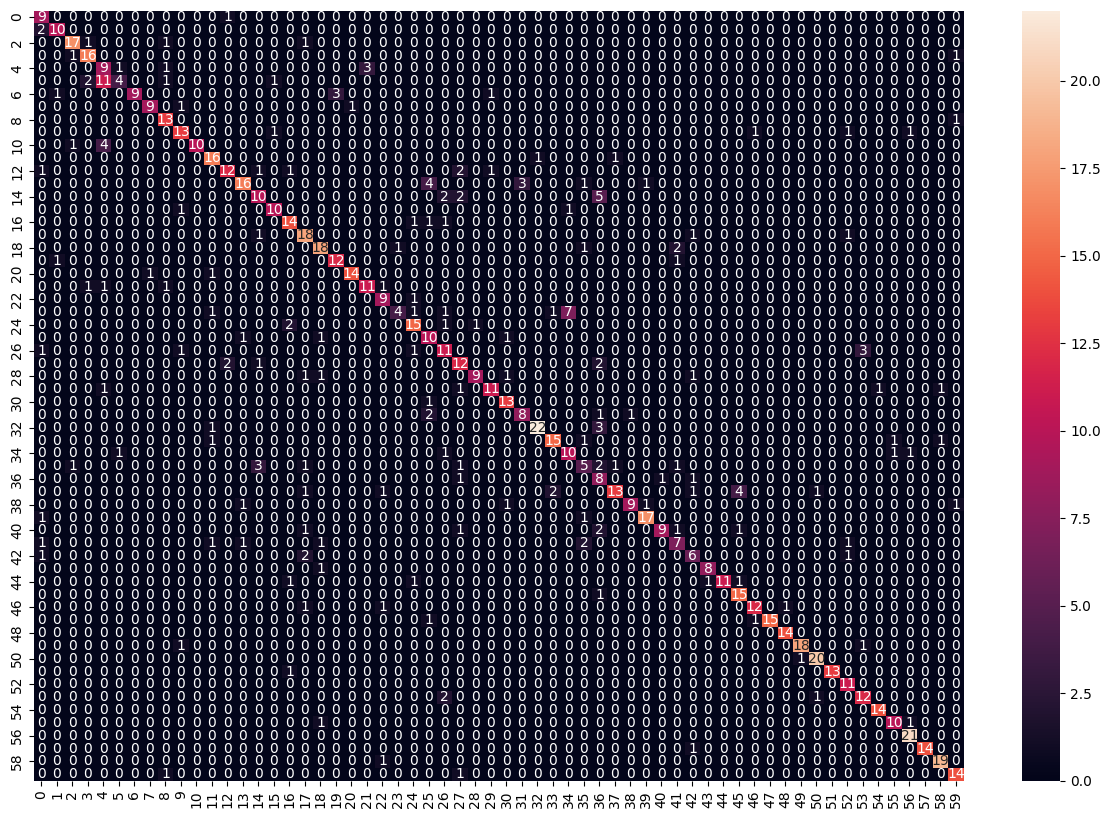

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(cf6, annot=True,fmt="1.0f")

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,precision_score,f1_score, recall_score,precision_score,average_precision_score,accuracy_score
# recall
v_r = recall_score(test_targets.argmax(axis=1), predIdxs6, average='weighted')
# precesion
v_p = precision_score(test_targets.argmax(axis=1), predIdxs6, average='weighted')
# f1 score
v_f1 = f1_score(test_targets.argmax(axis=1), predIdxs6, average='weighted')

print("Recall score: ",recall_score(test_targets.argmax(axis=1), predIdxs6,average='weighted'))
print("Precision score: ",precision_score(test_targets.argmax(axis=1), predIdxs6, average='weighted'))
print("F1 score: ",f1_score(test_targets.argmax(axis=1), predIdxs6, average='weighted'))

model_r["DenseNet"]=v_r

model_p["DenseNet"]=v_p

model_f1["DenseNet"]=v_f1

Recall score:  0.7726315789473684
Precision score:  0.7947357784218946
F1 score:  0.771037810378289


# Model Evaluations

In [ ]:
# training accuracy
import pandas as pd
model_scores = pd.DataFrame(model_acc, index=['Score']).transpose()
model_scores = model_scores.sort_values('Score',ascending=False)
model_scores

,Score
VGG16,0.925902
CNN,0.920374
DenseNet,0.808371
MobileNet,0.773230


In [ ]:
# test accuracy
model_scoress = pd.DataFrame(model_val_acc, index=['Score']).transpose()
model_scores_val = model_scoress.sort_values('Score',ascending=False)
model_scores_val

,Score
CNN,0.831579
VGG16,0.821053
DenseNet,0.786316
MobileNet,0.735789


Text(0, 0.5, 'Test acc Score')

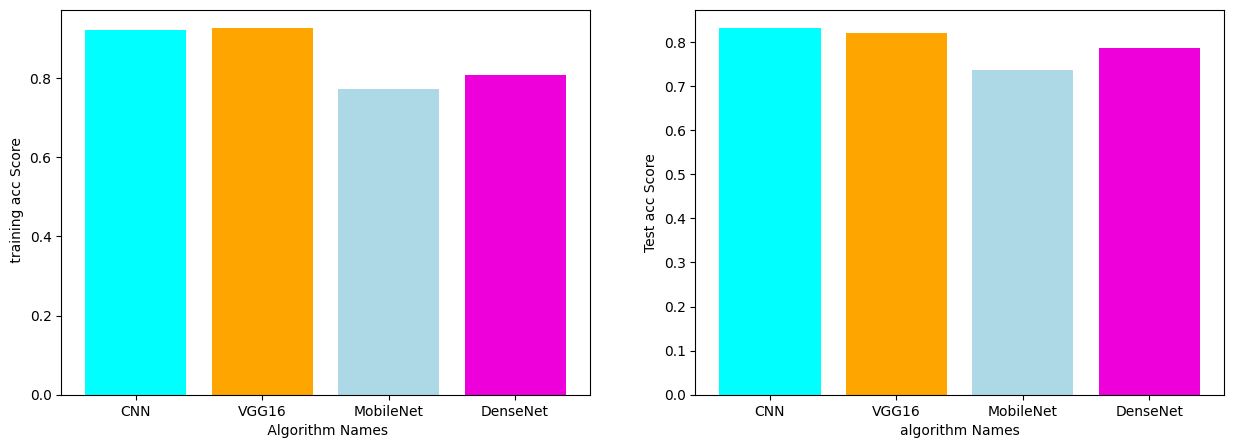

In [ ]:
# training accuracy
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
namess = list(model_acc.keys())
valuess = list(model_acc.values())
colors=["#00FFFF","#FFA500","#ADD8E6","#ED00D9","#ED1400"]
textprops = {"fontsize":22}

#plt.figure(figsize=(6,3))
plt.bar(namess,valuess,color=colors)
plt.xlabel(" Algorithm Names")
plt.ylabel(" training acc Score")

# test accuracy
plt.subplot(1,2,2)
names = list(model_val_acc.keys())
values = list(model_val_acc.values())
colors=["#00FFFF","#FFA500","#ADD8E6","#ED00D9","#ED1400"]
textprops = {"fontsize":22}

#plt.figure(figsize=(6,3))
plt.bar(names,values,color=colors)
plt.xlabel("algorithm Names")
plt.ylabel("Test acc Score")

In [ ]:
# model precesion
model_scores_p = pd.DataFrame(model_p, index=['Score']).transpose()
model_scores_p = model_scores_p.sort_values('Score',ascending=False)
model_scores_p

,Score
VGG16,0.862929
CNN,0.846050
DenseNet,0.794736
MobileNet,0.760099


Text(0, 0.5, ' model precesion')

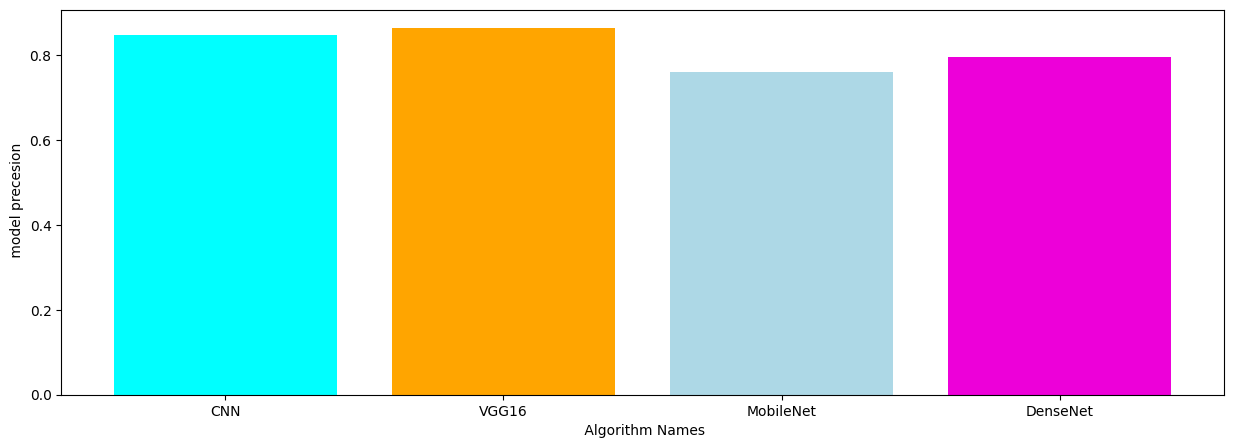

In [ ]:
# model precesion
plt.figure(figsize=(15,5))
namess = list(model_p.keys())
valuess = list(model_p.values())
colors=["#00FFFF","#FFA500","#ADD8E6","#ED00D9","#ED1400"]
textprops = {"fontsize":22}

plt.bar(namess,valuess,color=colors)
plt.xlabel(" Algorithm Names")
plt.ylabel(" model precesion")

In [ ]:
# model recall
model_scores_r = pd.DataFrame(model_r, index=['Score']).transpose()
model_scores_r = model_scores_r.sort_values('Score',ascending=False)
model_scores_r

,Score
VGG16,0.846316
CNN,0.832632
DenseNet,0.772632
MobileNet,0.722105


Text(0, 0.5, ' model recall')

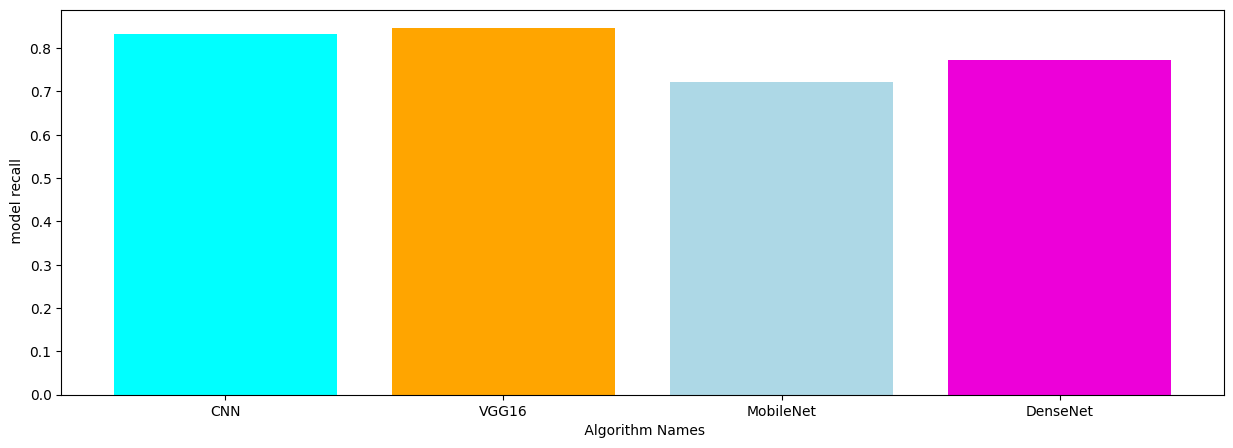

In [ ]:
# model recall
plt.figure(figsize=(15,5))
namess = list(model_r.keys())
valuess = list(model_r.values())
colors=["#00FFFF","#FFA500","#ADD8E6","#ED00D9","#ED1400"]
textprops = {"fontsize":22}

plt.bar(namess,valuess,color=colors)
plt.xlabel(" Algorithm Names")
plt.ylabel(" model recall")

In [ ]:
# model f1-score
model_scores_f1 = pd.DataFrame(model_f1, index=['Score']).transpose()
model_scores_f1 = model_scores_f1.sort_values('Score',ascending=False)
model_scores_f1

,Score
VGG16,0.847503
CNN,0.831698
DenseNet,0.771038
MobileNet,0.722872


Text(0, 0.5, ' model f1_score')

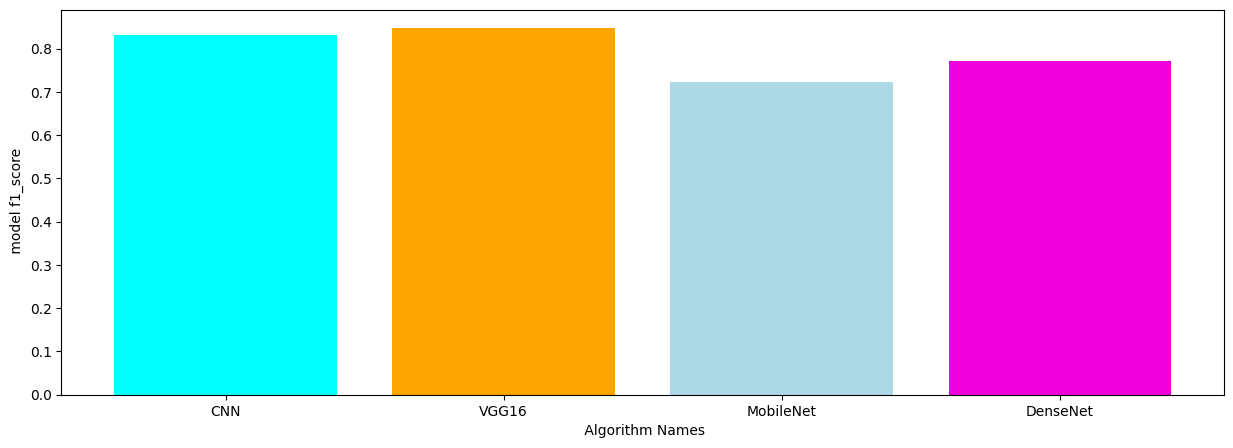

In [ ]:
# model f1-score
plt.figure(figsize=(15,5))
namess = list(model_f1.keys())
valuess = list(model_f1.values())
colors=["#00FFFF","#FFA500","#ADD8E6","#ED00D9","#ED1400"]
textprops = {"fontsize":22}

plt.bar(namess,valuess,color=colors)
plt.xlabel(" Algorithm Names")
plt.ylabel(" model f1_score")